# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
dtype_df = app_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,36
1,float64,70
2,object,16


In [4]:
# 先篩選數值型的欄位
int_features = []
float_features = []
dtype_select = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
        dtype_select.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
        dtype_select.append(feature)

In [5]:
print(int_features[0:5])
print(float_features[0:5])
print(dtype_select[0:5])
print(len(dtype_select))

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE']
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
106


In [12]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
#dtype_select = []

#numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])


In [6]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
dtype_select = list(app_train[dtype_select].columns[list(app_train[dtype_select].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns : %f" % len(dtype_select))

Numbers of remain columns : 78.000000


In [7]:
app_train[dtype_select]

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125402,245423,0,94500.0,225000.0,13045.5,225000.0,0.026392,-24310,365243,-1478.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125403,245424,2,76500.0,135000.0,13351.5,135000.0,0.004960,-15876,-2247,-3035.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
125404,245425,1,112500.0,270000.0,13500.0,270000.0,0.006629,-11264,-1139,-3073.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
125405,245427,0,135000.0,269550.0,21294.0,225000.0,0.024610,-10942,-1334,-4123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


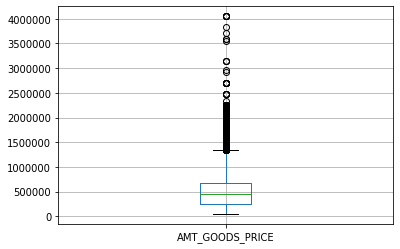

In [46]:
app_train['AMT_GOODS_PRICE'].plot.box(grid='True')

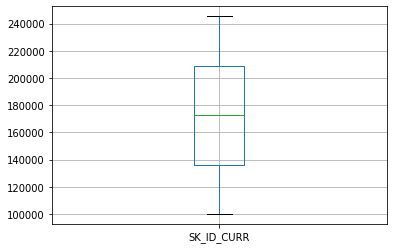

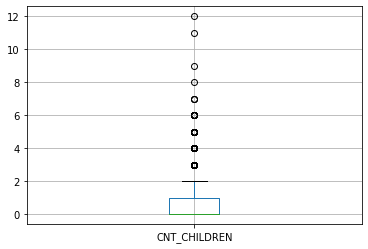

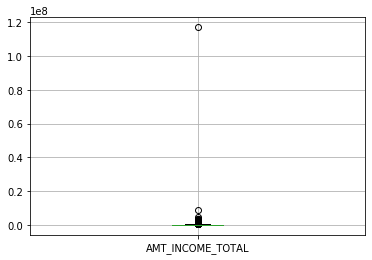

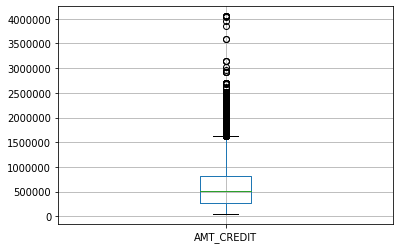

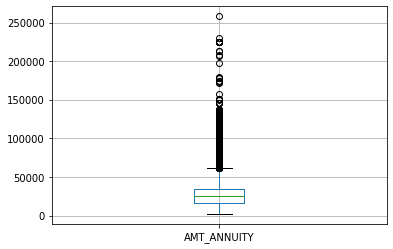

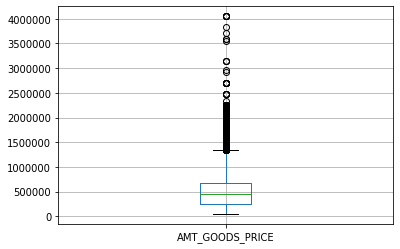

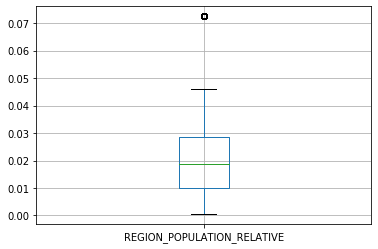

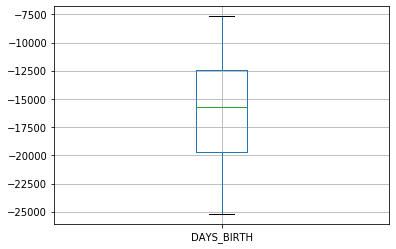

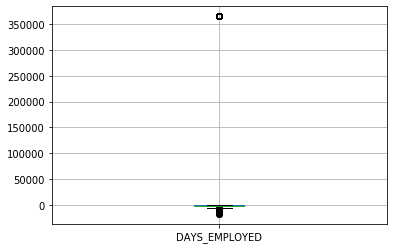

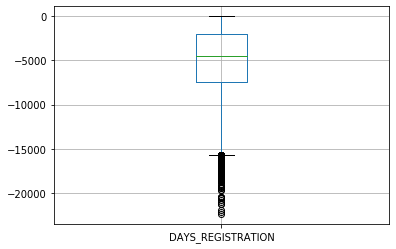

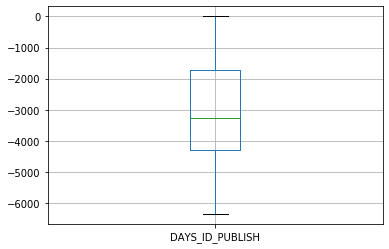

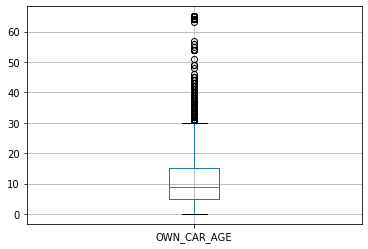

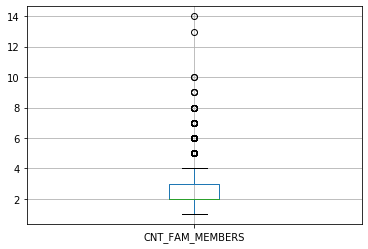

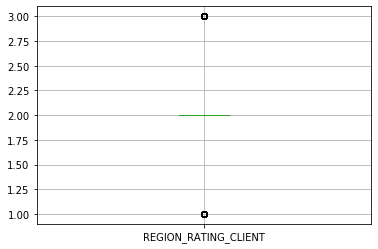

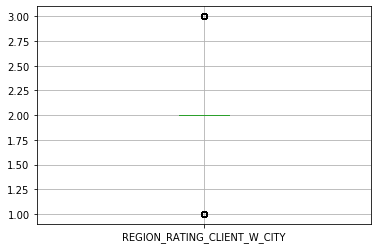

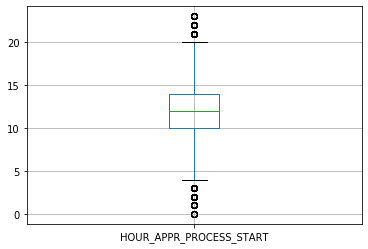

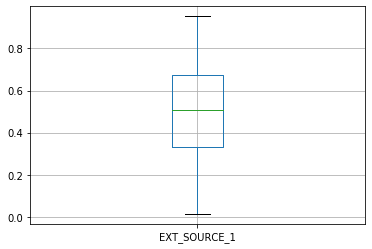

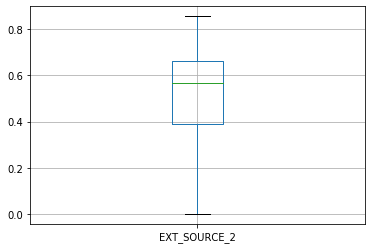

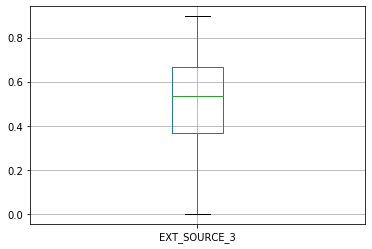

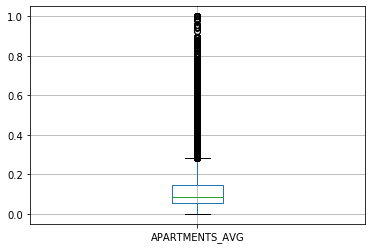

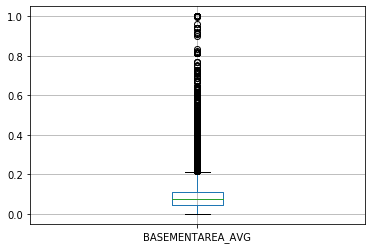

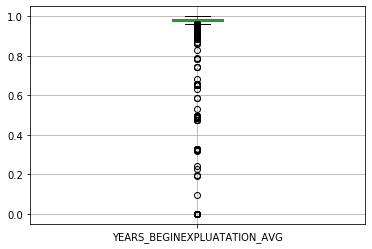

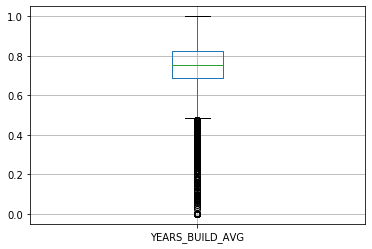

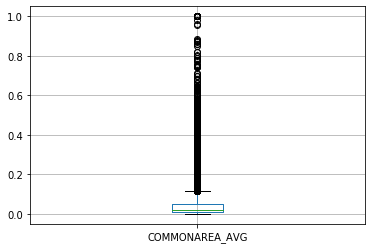

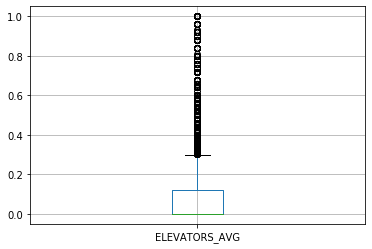

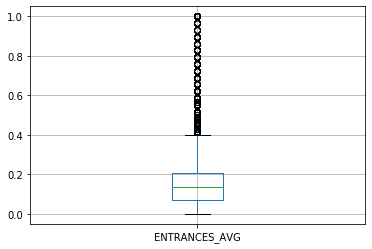

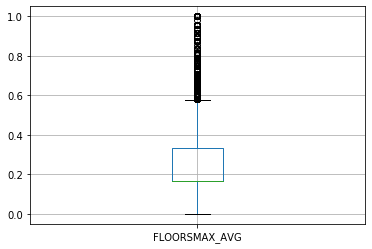

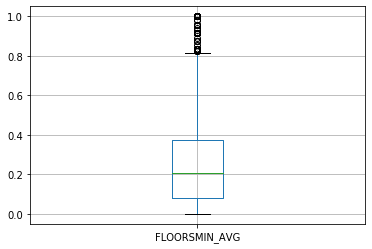

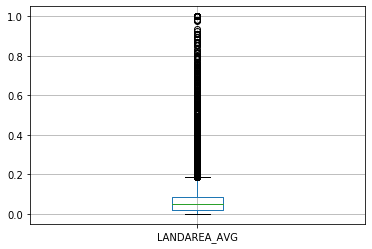

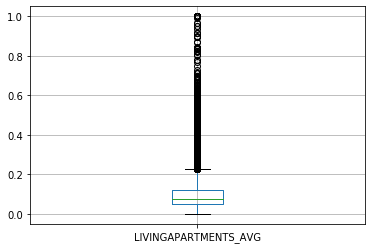

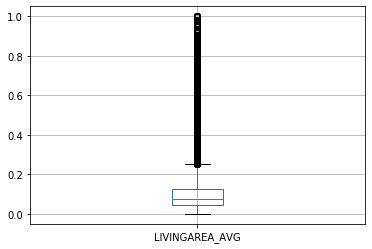

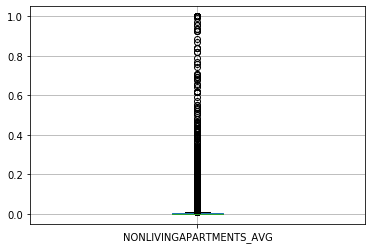

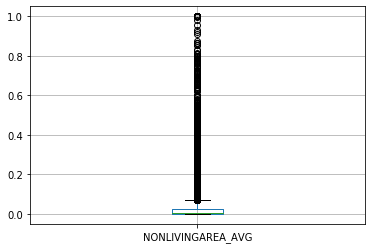

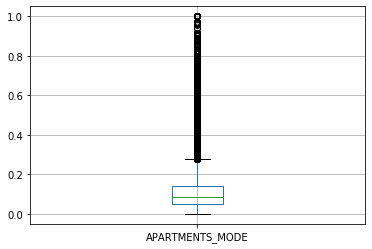

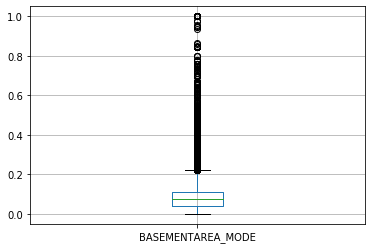

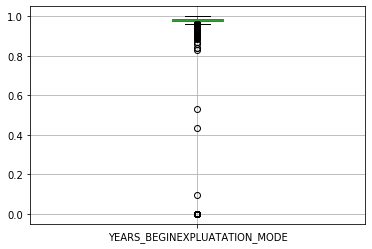

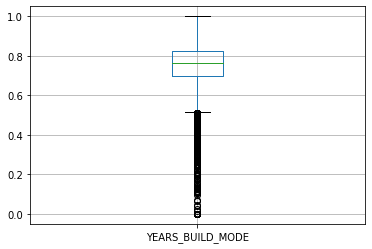

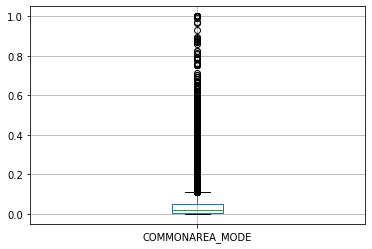

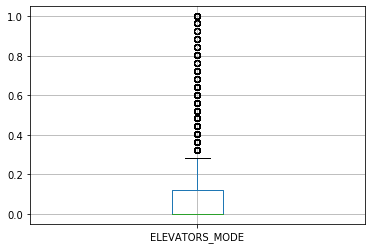

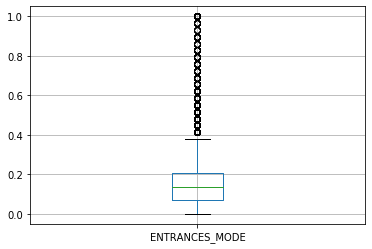

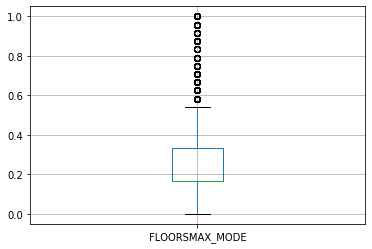

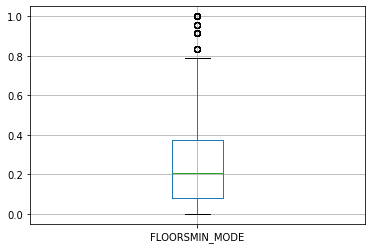

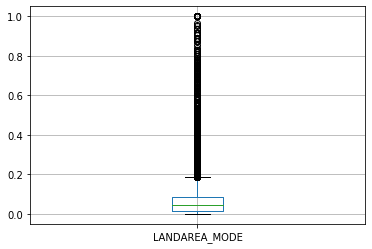

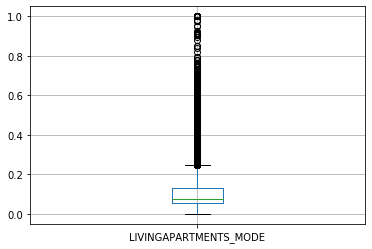

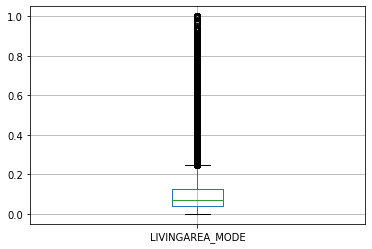

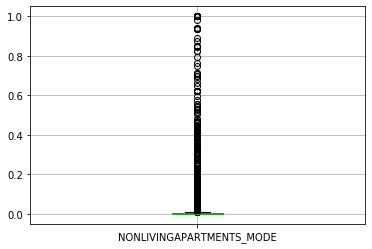

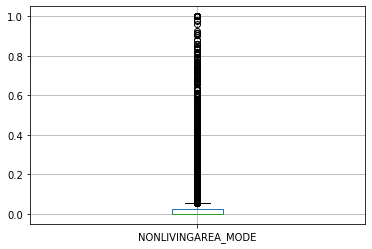

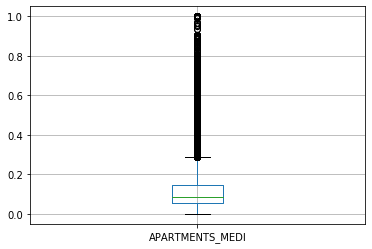

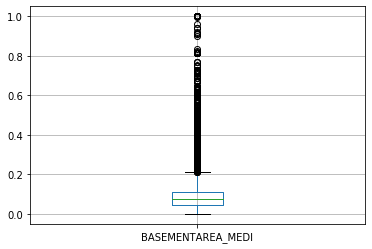

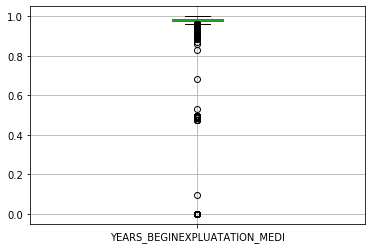

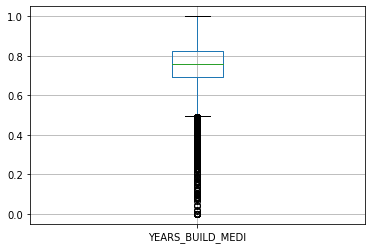

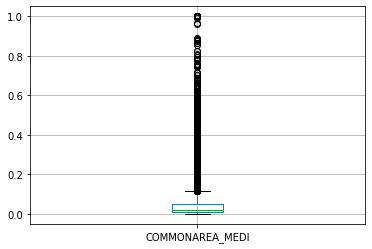

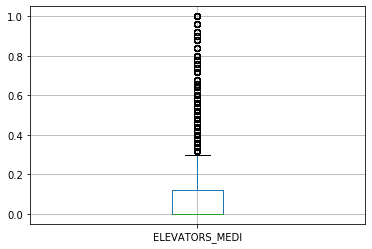

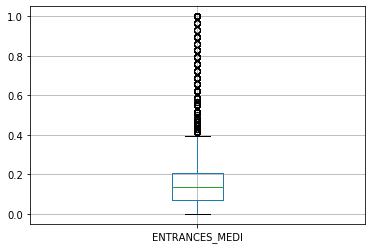

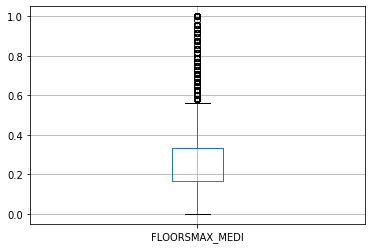

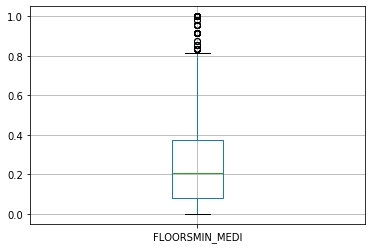

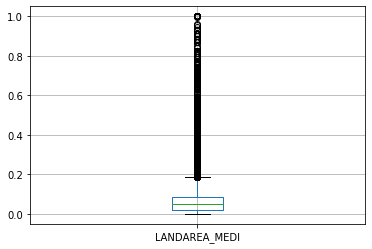

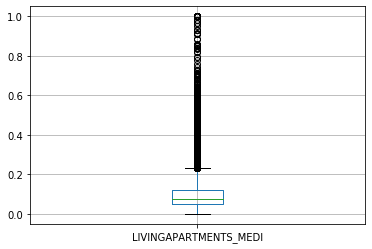

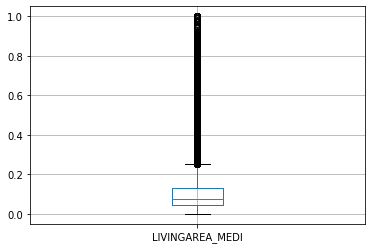

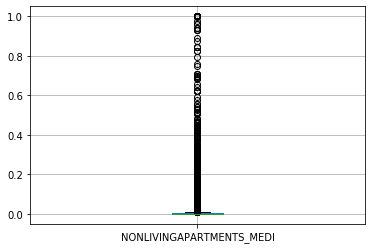

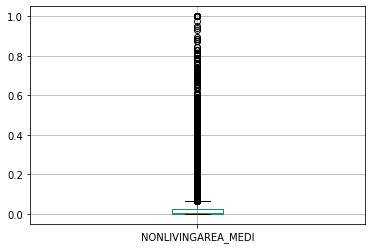

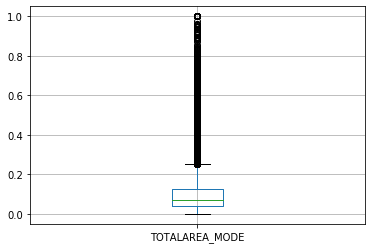

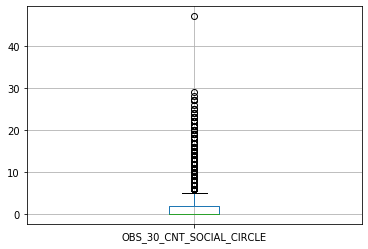

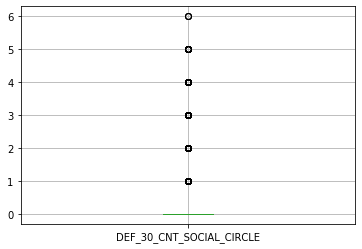

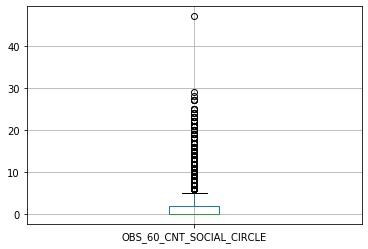

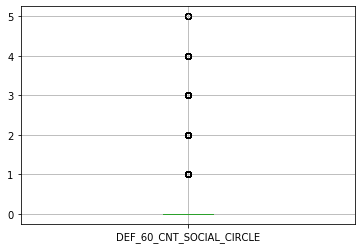

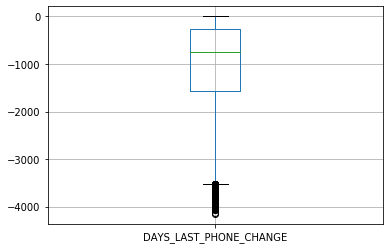

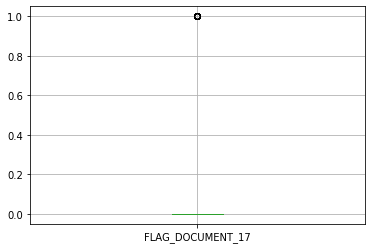

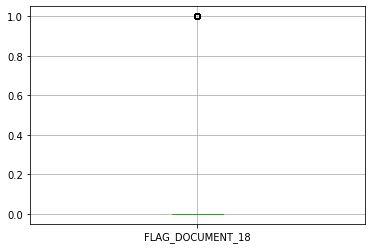

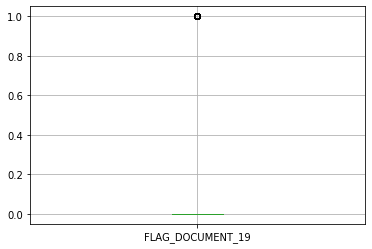

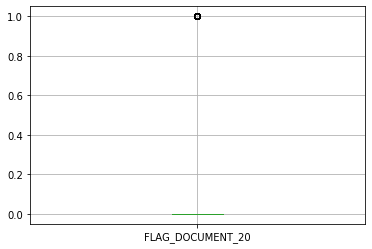

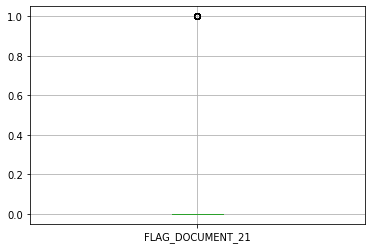

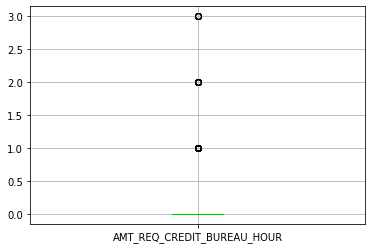

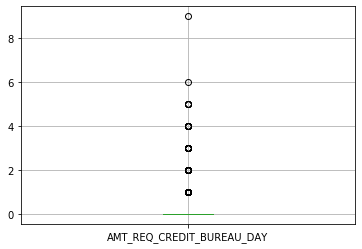

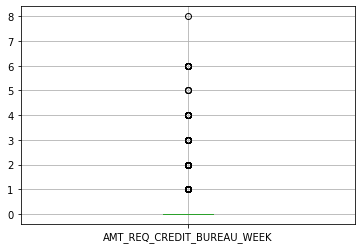

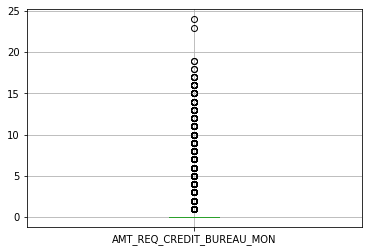

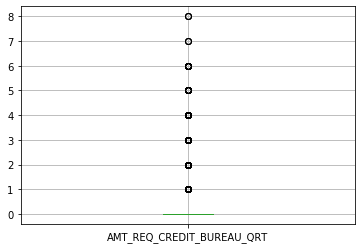

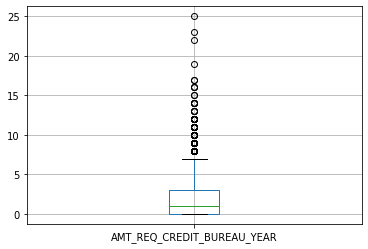

In [8]:
for col in dtype_select:
    app_train.boxplot(col) #pandas用法
    plt.show()
    
'''
https://www.ibm.com/support/knowledgecenter/zh-tw/SSEP7J_10.1.1/com.ibm.swg.ba.cognos.ug_cr_rptstd.10.1.1.doc/c_id_obj_boxplots.html
從箱延伸出的 T-bar 稱為內部界限值或盒鬚。它們會延伸到等於或小於距離箱末端 1.5 倍 IQR 的最小值和最大值。
如果資料為常態分佈，則預計約 95% 的資料處於內部界限值之間。

箱型圖可能包含離群值（標記為圓圈）和極值（標記為星號）。
離群值是距離箱末端 1.5 倍 IQR 到 3 倍 IQR 之間的值。

極值是距離箱末端超過 3 IQR 的值。
'''

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

https://medium.com/ai%E5%8F%8D%E6%96%97%E5%9F%8E/exploratory-data-analysis-%E6%8E%A2%E7%B4%A2%E8%B3%87%E6%96%99-ecdf-7fa350c32897

In [18]:
app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum() 

25650.0             2
27000.0            27
27900.0            29
28350.0            33
28404.0            34
                ...  
3600000.0      125403
3825000.0      125404
4500000.0      125405
9000000.0      125406
117000000.0    125407
Name: AMT_INCOME_TOTAL, Length: 1392, dtype: int64

count    1.254070e+05
mean     1.692108e+05
std      3.455959e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


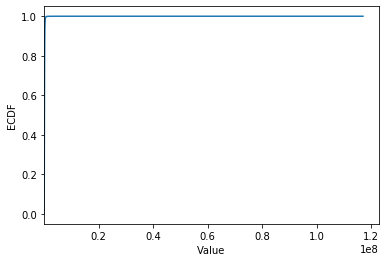

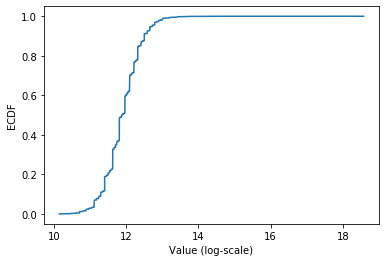

In [9]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum() 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 x 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    125407.000000
mean          0.020852
std           0.013809
min           0.000533
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


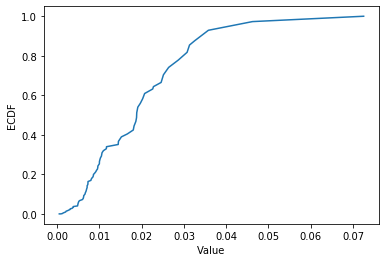

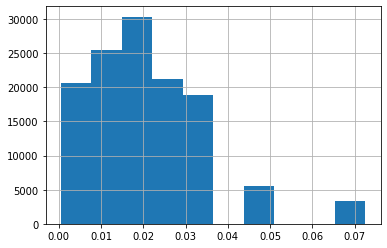

0.035792    6624
0.046220    5508
0.030755    4946
0.025164    4861
0.026392    4681
            ... 
0.001276     233
0.001417     210
0.001333      93
0.000533      17
0.000938      14
Name: REGION_POPULATION_RELATIVE, Length: 80, dtype: int64

In [19]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum() 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    124990.000000
mean          1.405144
std           2.297705
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


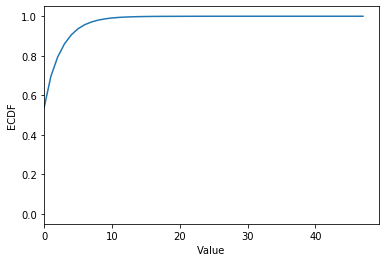

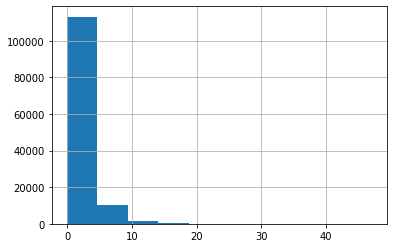

47.0        1
29.0        1
28.0        1
27.0        4
25.0        4
24.0        2
23.0        4
22.0       10
21.0       14
20.0       10
19.0       24
18.0       13
17.0       25
16.0       59
15.0       75
14.0      110
13.0      154
12.0      234
11.0      349
10.0      547
9.0       791
8.0      1177
7.0      1718
6.0      2584
5.0      3898
4.0      5693
3.0      8322
2.0     12233
1.0     19861
0.0     67072
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [21]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [47]:
# 把一些極端值暫時去掉，再繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here


loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE']>=0
loc_b = app_train['OBS_60_CNT_SOCIAL_CIRCLE']<=20

app_train.loc[loc_a , loc_b].hist()

plt.show()
"""

"\nYour Code Here\n\n\nloc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE']>=0\nloc_b = app_train['OBS_60_CNT_SOCIAL_CIRCLE']<=20\n\napp_train.loc[loc_a , loc_b].hist()\n\nplt.show()\n"

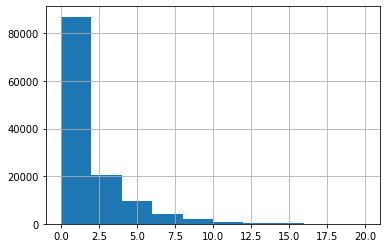

In [46]:
app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE']<=20]['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()